<a href="https://colab.research.google.com/github/prashantlv/digit_recog/blob/main/digit_rec_nlpbay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import ResNet50, VGG16
import matplotlib.pyplot as plt
%matplotlib inline
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

2


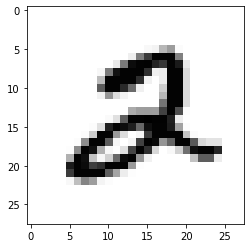

In [ ]:
print(y_train[5])
plt.imshow(x_train[5], cmap='Greys')
plt.show()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


In [ ]:
x_train[2].shape

(28, 28, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical

num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [ ]:
image_size = 224
img_shape = (image_size, image_size, 1)

print('Loading VGG16 ...')
base_model = VGG16(include_top=False,
                   weights='imagenet')
print('VGG16 loaded')

base_model.trainable = False
    
#base_model.summary()

Loading VGG16 ...
58892288/58889256 [==============================] - 0s 0us/step
VGG16 loaded


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

model = Sequential([base_model,
                    GlobalAveragePooling2D(), 
                    Dense(num_classes, activation='softmax')
                   ])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d_6 ( (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,           # rescale pixel values [0,255] to [0,1]
        horizontal_flip=True,     # random horizontal flip
        width_shift_range=0.2,    # random shift images horizontally (fraction of total width)
        height_shift_range=0.2,   # random shift images vertically (fraction of total height)
        zoom_range=0.2)           # random zoom image
        #rotation_range=20,       # random rotation
        #shear_range=0.2)         # shear transfo
        #validation_split=0.2)    # splitting train / test datasets

test_datagen = ImageDataGenerator(
        rescale=1./255)
        #validation_split=0.2)

train_gen = train_datagen.flow(
        x_train, y_train, 
        batch_size=32,
        shuffle=False)              # already applied

valid_gen = test_datagen.flow(
        x_test, y_test,
        batch_size=32,
        shuffle=False)   

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# history = model.fit_generator(
#     train_gen,
#     epochs=18 ,
#     validation_data=valid_gen)

Epoch 1/18


InvalidArgumentError: ignored